# Práctica de PLN — Teoría de la Información  
**Autor:** Luis Anthony Flores Portillo  


Este notebook utiliza módulos modulares (`.py`) para que se pueda reutilizar el código. (Los módulos los puede consultar en este mismo repositorio)

Favor de ejecuta cada sección para reproducir los resultados.

## Estructura del proyecto y dependencias
- `io_utils.py`: lectura/escritura
- `text_preprocess.py`: preprocesamiento y tokenización
- `freq_analysis.py`: frecuencias (carácter/palabra)
- `entropy_utils.py`: cálculo de la entropía
- `ngrams.py`: n-gramas
- `plots.py`: gráficas con Matplotlib
- `stopwords_es.py`: stopwords en español (ajustable)

> **Nota:** Las gráficas usan **Matplotlib** sin estilos ni colores específicos, como se solicita.

In [9]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lafp0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:

# Directorio raíz del proyecto 
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data"

# --- Imports de utilidades propias ---
from scripts.io_utils import read_text, write_text
from scripts.text_preprocess import preprocess_text, tokenize_words, characters_no_spaces
from scripts.freq_analysis import char_frequencies, word_frequencies, top_items
from scripts.entropy_utils import shannon_entropy
from scripts.ngrams import ngrams as word_ngrams
from scripts.plots import plot_histogram_from_counter

# Rutas a archivos de datos
text_files_small = [DATA_DIR / f"text_{i}.txt" for i in range(1, 6)]
book_files = [DATA_DIR / "libro_1.txt", DATA_DIR / "libro_2.txt"]

print("DATA_DIR:", DATA_DIR)
print("Archivos pequeños:", [str(p) for p in text_files_small])
print("Libros:", [str(p) for p in book_files])


DATA_DIR: c:\Users\lafp0\Documents\Github\ciencia-de-datos\procesamiento-lenguaje-natural\2°-practica\data
Archivos pequeños: ['c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\text_1.txt', 'c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\text_2.txt', 'c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\text_3.txt', 'c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\text_4.txt', 'c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\text_5.txt']
Libros: ['c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\libro_1.txt', 'c:\\Users\\lafp0\\Documents\\Github\\ciencia-de-datos\\procesamiento-lenguaje-natural\\2°-practica\\data\\libro_2.txt']


# Parte 1 — Preprocesamiento del texto
Acciones:
- Minúsculas
- Quitar acentos
- Eliminar caracteres: `;:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r`  
- Colapsar espacios múltiples

In [11]:
# Preprocesar textos
raw_small = {p.name: read_text(str(p)) for p in text_files_small}
raw_books = {p.name: read_text(str(p)) for p in book_files}

pre_small = {name: preprocess_text(txt) for name, txt in raw_small.items()}
pre_books = {name: preprocess_text(txt) for name, txt in raw_books.items()}

list(pre_small.keys()), list(pre_books.keys())

(['text_1.txt', 'text_2.txt', 'text_3.txt', 'text_4.txt', 'text_5.txt'],
 ['libro_1.txt', 'libro_2.txt'])

# Parte 2 — Frecuencias a nivel de **carácter** (text_1..text_5)
Reglas:
- No contar espacios en blanco.
- Histograma de caracteres de mayor a menor frecuencia.
- Interpretación: ¿qué caracteres dominan? ¿por qué?

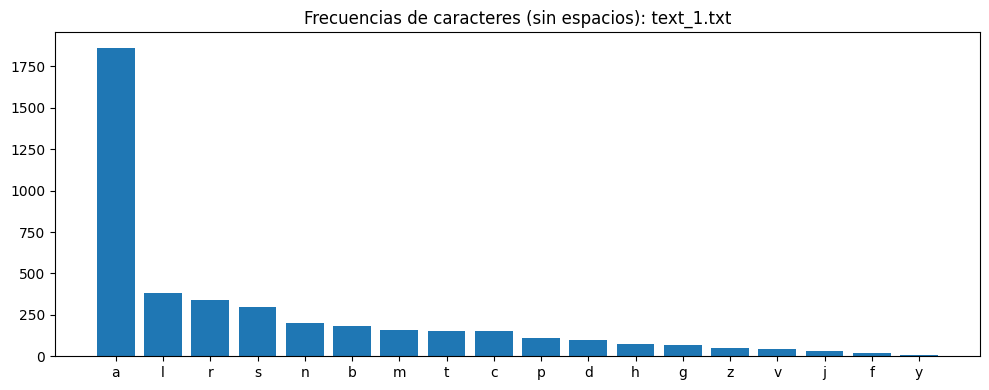

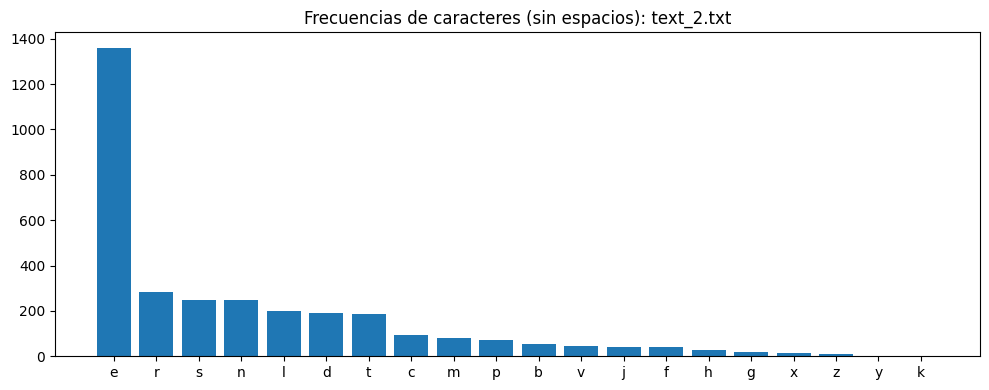

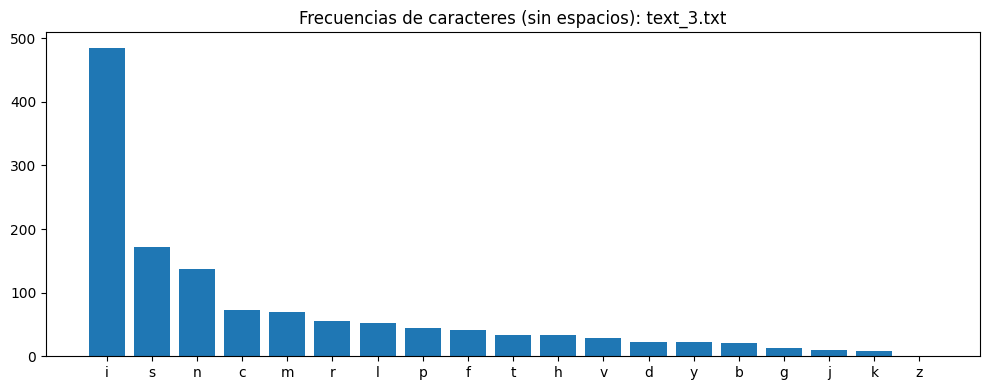

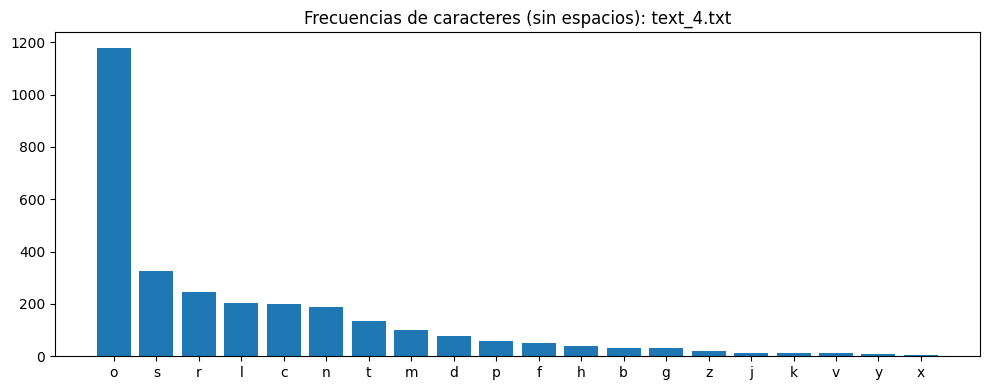

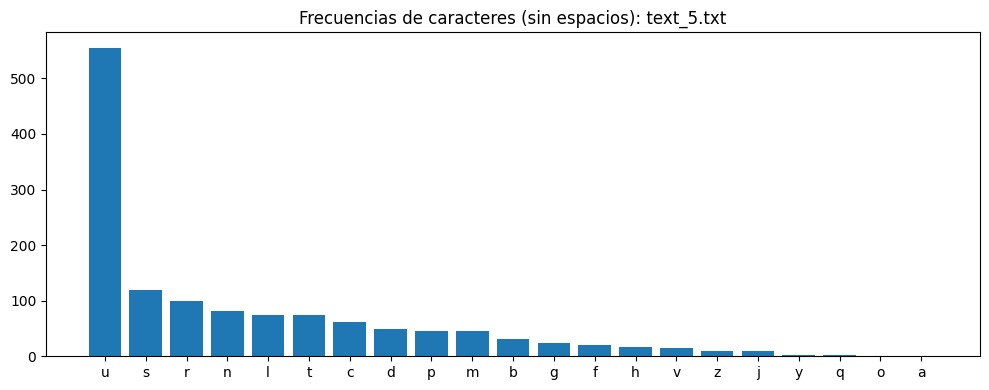

,archivo,caracter,conteo,porcentaje
0,text_1.txt,a,1863,44.03
1,text_1.txt,l,381,9.00
2,text_1.txt,r,338,7.99
3,text_1.txt,s,296,7.00
4,text_1.txt,n,202,4.77
5,text_2.txt,e,1360,42.43
6,text_2.txt,r,284,8.86
7,text_2.txt,s,247,7.71
8,text_2.txt,n,246,7.68
9,text_2.txt,l,199,6.21


In [12]:
# Frecuencias de caracteres y entropía (sin espacios)
char_freqs = {}
char_entropy = {}

for name, txt in pre_small.items():
    ns = characters_no_spaces(txt)
    cf = char_frequencies(ns)
    char_freqs[name] = cf
    char_entropy[name] = shannon_entropy(list(ns))
    # Plot
    fig = plot_histogram_from_counter(cf, title=f"Frecuencias de caracteres (sin espacios): {name}")
    plt.show()

# Resumen top-5 por archivo
import pandas as pd
rows = []
for name, cf in char_freqs.items():
    total = sum(cf.values())
    for ch, c in cf.most_common(5):
        rows.append({"archivo": name, "caracter": ch, "conteo": c, "porcentaje": round(100*c/total, 2)})
df_char_top5 = pd.DataFrame(rows)
df_char_top5

Podemos notar que las vocales son las que más predominan, lo cual hace sentido debido a que las vocales son las más usadas a comparación de las consonantes. Es decir, casi siempre después de una consonante va una vocal, por lo que es más probable que salgan vocales. Sin embargo, algo que parece curioso, es que el texto 1 predonomina la A, el texto 2 la E y así hasta el texto 5 con la U. 

Aunque parezca extraño, si vemos los textos individualmente vemos que hacen sentido ya que esas vocales son las que están más presentes en cada uno de los textos.

# Parte 3 — Frecuencias a nivel de **palabra** (libro_1, libro_2)
Preguntas por archivo:
- ¿Cuántas palabras hay en total?
- ¿Cuántas palabras únicas?
- ¿Cuántas palabras ocurren solo una vez (hapax legomena)?
- Histograma (top 30) de palabras más frecuentes.

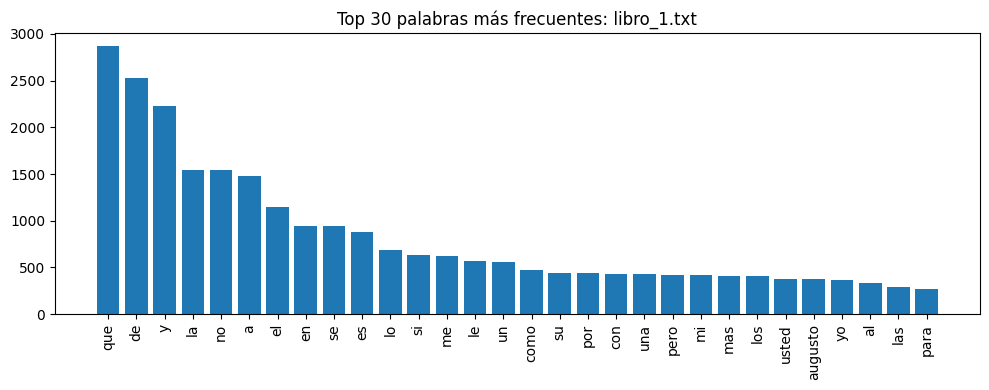

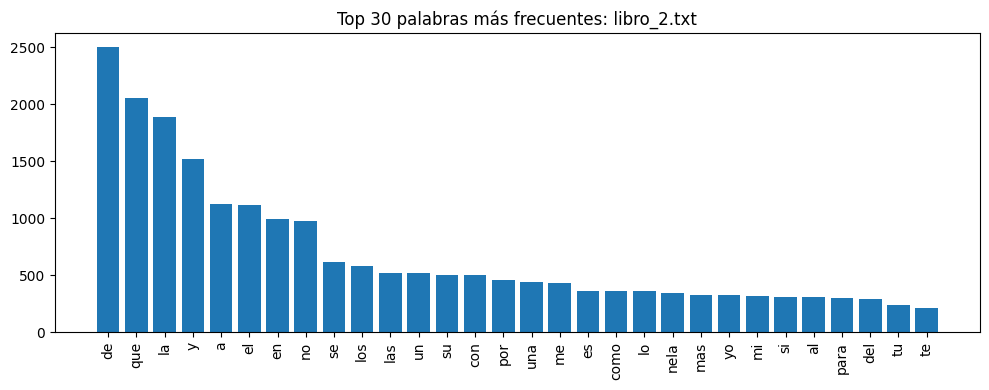

,archivo,total_palabras,palabras_unicas,hapax_legomena
0,libro_1.txt,57269,7453,4344
1,libro_2.txt,50997,8160,4865


In [13]:
# Frecuencias de palabras y métricas
word_freqs_books = {}
stats_rows = []

for name, txt in pre_books.items():
    tokens = tokenize_words(txt)
    wf = word_frequencies(tokens)
    word_freqs_books[name] = wf
    total = len(tokens)
    unique = len(wf)
    hapax = sum(1 for w,c in wf.items() if c==1)
    stats_rows.append({"archivo": name, "total_palabras": total, "palabras_unicas": unique, "hapax_legomena": hapax})
    # Plot top 30
    fig = plot_histogram_from_counter(wf, title=f"Top 30 palabras más frecuentes: {name}", max_items=30, rotation=90)
    plt.show()

df_stats_books = pd.DataFrame(stats_rows)
df_stats_books

# Parte 4 — Entropía (Shannon)
- **Carácter** (text_1..text_5), sin espacios.  
- **Palabra** (libro_1, libro_2):  
  - con todas las palabras  
  - eliminando *stopwords* (lista editable en `stopwords_es.py`)

In [14]:
STOPWORDS_ES = set(stopwords.words("spanish"))

rows = []
entropy_books_all = {}
entropy_books_nostop = {}

for name, txt in pre_books.items():
    tokens = tokenize_words(txt)

    # Entropía con todas las palabras
    H_all = shannon_entropy(tokens)

    # Entropía sin stopwords 
    tokens_ns = [w for w in tokens if w not in STOPWORDS_ES]
    H_ns = shannon_entropy(tokens_ns)

    entropy_books_all[name] = H_all
    entropy_books_nostop[name] = H_ns

    rows.append({"archivo": name, "nivel": "palabra (todas)", "entropia_bits": H_all})
    rows.append({"archivo": name, "nivel": "palabra (sin stopwords)", "entropia_bits": H_ns})

df_entropy = pd.DataFrame(rows)
df_entropy.sort_values(["archivo", "nivel"]).reset_index(drop=True)
df_entropy

,archivo,nivel,entropia_bits
0,libro_1.txt,palabra (todas),9.172092
1,libro_1.txt,palabra (sin stopwords),11.085096
2,libro_2.txt,palabra (todas),9.571118
3,libro_2.txt,palabra (sin stopwords),11.522822


# Parte 5 — *N*-gramas (n = 2 ... 5)
Explorar patrones dominantes (top 15) en cada libro.

In [15]:
tablas_por_n = {}
tablas_por_n_nostop = {}

for name, txt in pre_books.items():
    tokens = tokenize_words(txt)

    # tokens sin stopwords
    tokens_ns = [w for w in tokens if w not in STOPWORDS_ES]

    for n in range(2, 6):
        # --- con stopwords ---
        c = word_ngrams(tokens, n)
        top15 = c.most_common(15)
        df = pd.DataFrame(top15, columns=["ngram", "frecuencia"])
        df["archivo"] = name
        df["n"] = n
        tablas_por_n.setdefault(n, []).append(df)

        # --- sin stopwords ---
        c_ns = word_ngrams(tokens_ns, n)
        top15_ns = c_ns.most_common(15)
        df_ns = pd.DataFrame(top15_ns, columns=["ngram", "frecuencia"])
        df_ns["archivo"] = name
        df_ns["n"] = n
        tablas_por_n_nostop.setdefault(n, []).append(df_ns)

tablas_por_n = {
    n: pd.concat(dfs, ignore_index=True).sort_values(["archivo","frecuencia"], ascending=[True, False])
    for n, dfs in tablas_por_n.items()
}

tablas_por_n_nostop = {
    n: pd.concat(dfs, ignore_index=True).sort_values(["archivo","frecuencia"], ascending=[True, False])
    for n, dfs in tablas_por_n_nostop.items()
}


In [16]:
tablas_por_n[2].head(10)

,ngram,frecuencia,archivo,n
0,de la,261,libro_1.txt,2
1,lo que,254,libro_1.txt,2
2,que no,243,libro_1.txt,2
3,que se,195,libro_1.txt,2
4,a la,153,libro_1.txt,2
5,que me,139,libro_1.txt,2
6,no es,133,libro_1.txt,2
7,no se,123,libro_1.txt,2
8,en el,122,libro_1.txt,2
9,es que,121,libro_1.txt,2


In [17]:
tablas_por_n_nostop[2].head(10)

,ngram,frecuencia,archivo,n
0,don augusto,77,libro_1.txt,2
1,don miguel,41,libro_1.txt,2
2,pues bien,25,libro_1.txt,2
3,don fermin,24,libro_1.txt,2
4,eugenia eugenia,22,libro_1.txt,2
5,quiere usted,22,libro_1.txt,2
6,si mismo,21,libro_1.txt,2
7,puede ser,20,libro_1.txt,2
8,dona ermelinda,20,libro_1.txt,2
9,si si,18,libro_1.txt,2


In [18]:
tablas_por_n[3].head(10)

,ngram,frecuencia,archivo,n
0,de lo que,37,libro_1.txt,3
1,lo que me,27,libro_1.txt,3
2,que no se,23,libro_1.txt,3
3,por que no,22,libro_1.txt,3
4,lo que es,21,libro_1.txt,3
5,nada mas que,20,libro_1.txt,3
6,lo que no,19,libro_1.txt,3
7,no es eso,18,libro_1.txt,3
8,me parece que,18,libro_1.txt,3
9,que no es,16,libro_1.txt,3


In [19]:
tablas_por_n_nostop[3].head(10)

,ngram,frecuencia,archivo,n
0,usted don augusto,10,libro_1.txt,3
1,pobre amo mio,8,libro_1.txt,3
2,senor don augusto,7,libro_1.txt,3
3,augusto don augusto,6,libro_1.txt,3
4,rodriguez alburquerque alvarez,6,libro_1.txt,3
5,alburquerque alvarez castro,6,libro_1.txt,3
6,don augusto perez,5,libro_1.txt,3
7,exclamo don fermin,5,libro_1.txt,3
8,misteriosa luz espiritual,5,libro_1.txt,3
9,don augusto don,5,libro_1.txt,3


In [20]:
tablas_por_n[4].head(10)

,ngram,frecuencia,archivo,n
0,no es mas que,11,libro_1.txt,4
1,un ente de ficcion,9,libro_1.txt,4
2,y por que no,8,libro_1.txt,4
3,lo que me pasa,7,libro_1.txt,4
4,de carne y hueso,6,libro_1.txt,4
5,por que no he,6,libro_1.txt,4
6,que no he de,6,libro_1.txt,4
7,despues de lo que,6,libro_1.txt,4
8,que es lo que,6,libro_1.txt,4
9,rodriguez de alburquerque y,6,libro_1.txt,4


In [21]:
tablas_por_n_nostop[4].head(10)

,ngram,frecuencia,archivo,n
0,rodriguez alburquerque alvarez castro,6,libro_1.txt,4
1,don augusto don augusto,4,libro_1.txt,4
2,puede ser puede ser,3,libro_1.txt,4
3,quiere usted comprarme quiere,3,libro_1.txt,4
4,usted comprarme quiere usted,3,libro_1.txt,4
5,querer comprarme querer comprarme,3,libro_1.txt,4
6,emprender viaje largo lejano,3,libro_1.txt,4
7,pobre amo mio pobre,3,libro_1.txt,4
8,amo mio pobre amo,3,libro_1.txt,4
9,mio pobre amo mio,3,libro_1.txt,4


In [22]:
tablas_por_n[5].head(10)

,ngram,frecuencia,archivo,n
0,por que no he de,6,libro_1.txt,5
1,rodriguez de alburquerque y alvarez,6,libro_1.txt,5
2,de alburquerque y alvarez de,6,libro_1.txt,5
3,alburquerque y alvarez de castro,6,libro_1.txt,5
4,no me quiere no me,5,libro_1.txt,5
5,me quiere no me quiere,5,libro_1.txt,5
6,cuenta de lo que hacia,5,libro_1.txt,5
7,la madre de mis hijos,5,libro_1.txt,5
8,y en cuanto a eso,4,libro_1.txt,5
9,los caminos de la providencia,4,libro_1.txt,5


In [23]:
tablas_por_n_nostop[5].head(10)

,ngram,frecuencia,archivo,n
0,quiere usted comprarme quiere usted,3,libro_1.txt,5
1,pobre amo mio pobre amo,3,libro_1.txt,5
2,amo mio pobre amo mio,3,libro_1.txt,5
3,eugenia domingo arco avenida alameda,2,libro_1.txt,5
4,domingo arco avenida alameda 58,2,libro_1.txt,5
5,casa dulce tibia luz entraba,2,libro_1.txt,5
6,dulce tibia luz entraba blancas,2,libro_1.txt,5
7,tibia luz entraba blancas flores,2,libro_1.txt,5
8,luz entraba blancas flores bordadas,2,libro_1.txt,5
9,entraba blancas flores bordadas visillos,2,libro_1.txt,5


### Conclusiones sobre *n*-gramas

Esta parte de los *n*-gramas se me hace muy interesante porque la diferencia entre usar stopwords y quitarlas es enorme.  

- **Con stopwords** aparecen combinaciones súper comunes como *“de que”*, *“es que”*, o un montón de frases dominadas por la palabra *“que”*. Esto pasa en todos los niveles (*n = 2, 3, 4, 5*), así que básicamente los resultados se llenan de estructuras muy típicas del español.  
- **Sin stopwords** cambian mucho las cosas: empiezan a salir combinaciones más curiosas y con más carga de significado, por ejemplo *“quiere usted comprarme”*, *“amo mío pobre amo mío”*, o nombres propios como *“don fermín”* y hasta *“rodríguez alburquerque álvarez castro”*.  

En resumen, al quitar las stopwords se descubren patrones más ligados al contenido real de los textos, y no tanto a las muletillas del idioma.

